In [83]:
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
from keras import models, layers
import torch

In [84]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
CLASS_NAMES = ['Crack', 'Pothole', 'Surface erosion']
N_CLASSES = len(CLASS_NAMES)

In [85]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\\Masrafe\\Coding\\Git_Hub_code\\ml_project\\road_damage\\pothole_detection_CNN-main\\Dataset_own_1',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1335 files belonging to 3 classes.


In [86]:
class_names = dataset.class_names
class_names

['Crack', 'Pothole', 'Surface Erosion']

In [87]:
len(dataset)

42

In [88]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 0 0 2 2 2 0 0 2 1 1 2 0 1 0 1 1 2 0 1 0 2 1 0 1 1 2 0 0 2 0]


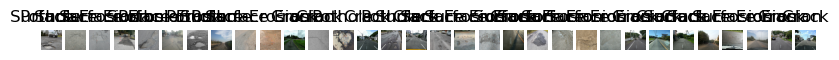

In [89]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    batch_size = image_batch.shape[0]  # Get the actual batch size
    for i in range(batch_size):  # Loop only over the available images
        ax = plt.subplot(1, batch_size, i+1)  # Adjust subplot layout dynamically
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [90]:
len(dataset)
#80% for training
#10% for validation
#10% for test

42

In [91]:
train_size = 0.8
len(dataset)*train_size

33.6

In [92]:
train_data = dataset.take(33)
len(train_data)

33

In [93]:
test_data = dataset.skip(33)
len(test_data)

9

In [94]:
validation_size = 0.1
len(dataset)*validation_size

4.2

In [95]:
validation_data  = test_data.take(4)
len(validation_data)

4

In [96]:
test_data = test_data.skip(4)
len(test_data)

5

In [97]:
# Dataset split function
def get_dataset_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = tf.data.experimental.cardinality(ds).numpy()
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    return train_ds, val_ds, test_ds


In [98]:
train_data, validation_data, test_data = get_dataset_partition(dataset)

In [99]:
print(len(train_data))
print(len(validation_data))
print(len(test_data))

33
4
5


In [100]:
# train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Cache, shuffle and prefetch
def prepare(ds):
    return ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

train_data = prepare(train_data)
validation_data = prepare(validation_data)
test_data = prepare(test_data)

In [101]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [102]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [103]:
# Model builders
def build_vgg19_model():
    base = tf.keras.applications.VGG19(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')
    base.trainable = False
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(N_CLASSES, activation='softmax')
    ])
    return model

In [104]:
def build_resnet50_model():
    base = tf.keras.applications.ResNet50(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')
    base.trainable = False
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(N_CLASSES, activation='softmax')
    ])
    return model

In [105]:
def build_efficientnet_model():
    base = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')
    base.trainable = False
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(N_CLASSES, activation='softmax')
    ])
    return model

In [106]:
def build_mobilenet_model():
    base = tf.keras.applications.MobileNetV2(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')
    base.trainable = False
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(N_CLASSES, activation='softmax')
    ])
    return model

In [107]:
model = build_mobilenet_model()

C:\Users\MBHS_PC\AppData\Local\Temp\ipykernel_12144\3736113410.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = tf.keras.applications.MobileNetV2(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')


In [108]:
# n_classes = 3
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax')
# ])
# model.build(input_shape=input_shape)

In [109]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [110]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [111]:
# history = model.fit(
#     train_data,
#     epochs=EPOCH,
#     batch_size=BATCH_SIZE,
#     verbose = 1,
#     validation_data=validation_data
# )

# Train model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=validation_data
)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 897ms/step - accuracy: 0.5906 - loss: 0.9037 - val_accuracy: 0.8125 - val_loss: 0.4955
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 761ms/step - accuracy: 0.8458 - loss: 0.4140 - val_accuracy: 0.8672 - val_loss: 0.4021
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 729ms/step - accuracy: 0.8580 - loss: 0.3682 - val_accuracy: 0.8516 - val_loss: 0.4189
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 739ms/step - accuracy: 0.8571 - loss: 0.3493 - val_accuracy: 0.8281 - val_loss: 0.4310
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 723ms/step - accuracy: 0.8657 - loss: 0.3289 - val_accuracy: 0.8438 - val_loss: 0.4653
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 689ms/step - accuracy: 0.8900 - loss: 0.2991 - val_accuracy: 0.8438 - val_loss: 0.4213
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 695ms/step - accuracy: 0.9002 - loss: 0.2754 - val_accuracy: 0.8281 - val_loss: 0.4927
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 698ms/step - accuracy: 0.8711 - loss: 0.3331 - val_accu

In [112]:
scores = model.evaluate(test_data)
scores

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - accuracy: 0.9378 - loss: 0.1754


[0.2092256098985672, 0.918749988079071]

In [113]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 33}

In [114]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [115]:
history.history['accuracy']

[0.7092803120613098,
 0.8446969985961914,
 0.8570075631141663,
 0.8636363744735718,
 0.8617424368858337,
 0.8844696879386902,
 0.8825757503509521,
 0.8882575631141663,
 0.8835227489471436,
 0.8948863744735718,
 0.8958333134651184,
 0.8920454382896423,
 0.9005681872367859,
 0.9109848737716675,
 0.9119318127632141,
 0.904356062412262,
 0.90625,
 0.9166666865348816,
 0.9119318127632141,
 0.9185606241226196,
 0.9100378751754761,
 0.9157196879386902,
 0.9318181872367859,
 0.9299242496490479,
 0.9308711886405945,
 0.9147727489471436,
 0.9261363744735718,
 0.9469696879386902,
 0.9337121248245239,
 0.935606062412262,
 0.9337121248245239,
 0.9327651262283325,
 0.9365530014038086,
 0.9412878751754761,
 0.9346590638160706,
 0.9403409361839294,
 0.9270833134651184,
 0.9346590638160706,
 0.9365530014038086,
 0.9412878751754761,
 0.9412878751754761,
 0.9412878751754761,
 0.9441288113594055,
 0.9441288113594055,
 0.939393937587738,
 0.9422348737716675,
 0.9403409361839294,
 0.9488636255264282,
 0.948

In [116]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

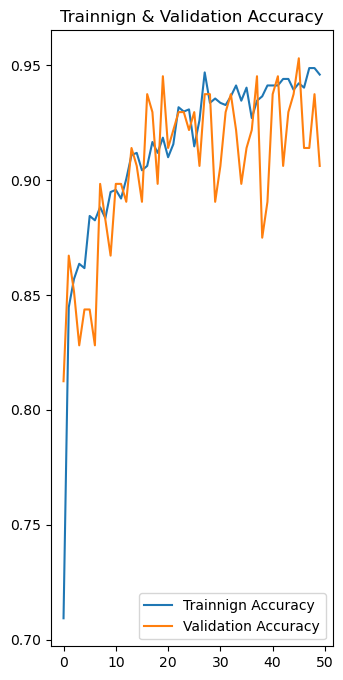

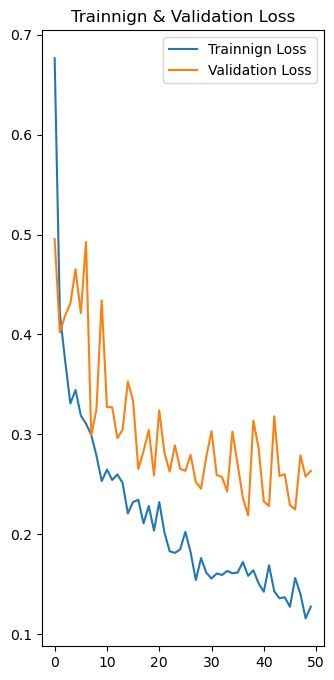

In [117]:

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label = "Trainnign Accuracy")
plt.plot(range(EPOCHS), val_accuracy, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Trainnign & Validation Accuracy")

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = "Trainnign Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title("Trainnign & Validation Loss")
plt.show()

In [118]:
model.evaluate(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step - accuracy: 0.9187 - loss: 0.2050


[0.2092256098985672, 0.918749988079071]

First image to predict
First image actual label:  Crack
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label:  Crack


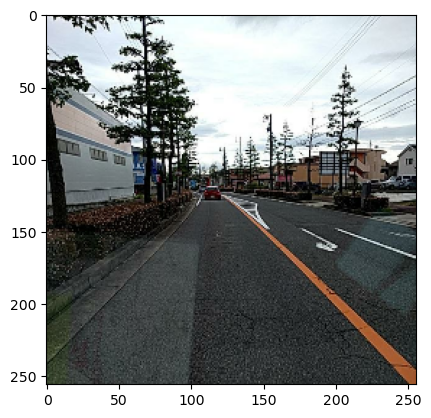

In [119]:
import numpy as np
for image_batch, label_batch in test_data.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [120]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    prediction = model.predict(img_array)
    
    predicted_calss = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    
    return predicted_calss, confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
100.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
95.08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
98.37
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
62.11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
99.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
100.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
97.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
99.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
100.0


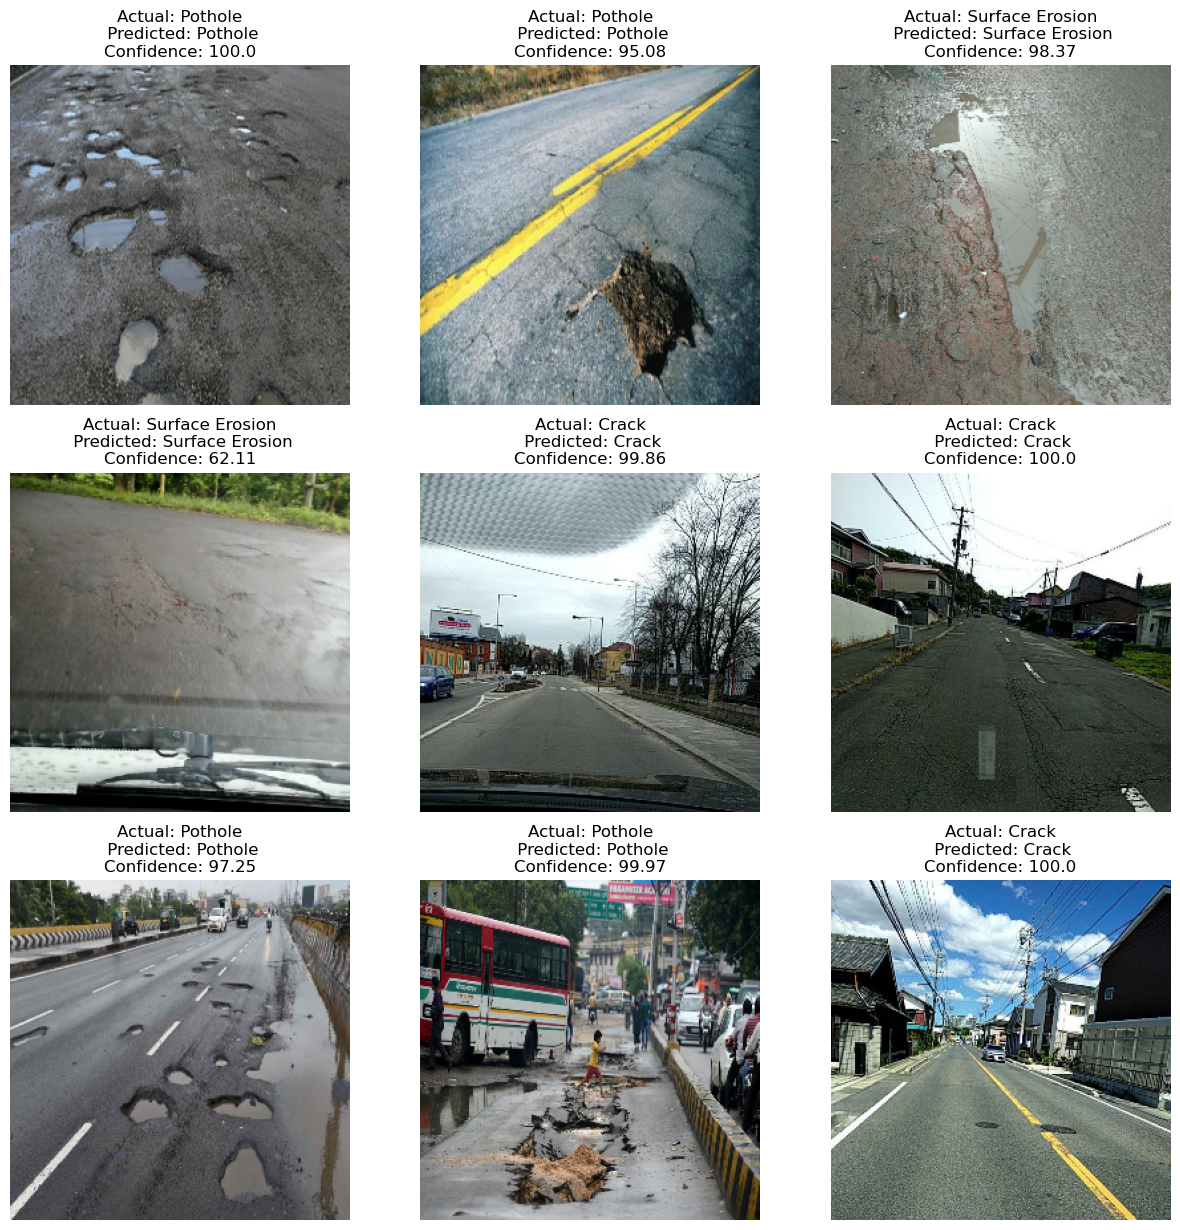

In [121]:

plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, connfidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\nConfidence: {connfidence}")
        print(connfidence)
        plt.axis("off")

In [122]:
confidence_threshold = 0.8
if connfidence >= confidence_threshold:
    print(f"Prediction: {predicted_class}, Confidence: {connfidence}")
else:
    print("Prediction confidence is too low.")


Prediction: Crack, Confidence: 100.0


In [123]:
# import numpy as np
# import torch
# from typing import List, Dict

# def non_max_suppression(boxes: List[Dict], iou_threshold: float = 0.45) -> List[Dict]:
#     """
#     Apply Non-Maximum Suppression to remove overlapping bounding boxes.
    
#     Args:
#         boxes (List[Dict]): List of dictionaries containing detection info
#                            Each dict should have 'bbox' [x1,y1,x2,y2], 'confidence', and 'class'
#         iou_threshold (float): IoU threshold for considering boxes as overlapping
    
#     Returns:
#         List[Dict]: Filtered list of detections after NMS
#     """
#     # If no boxes, return empty list
#     if not boxes:
#         return []
    
#     # Convert boxes to numpy arrays for processing
#     boxes_array = np.array([[box['bbox'][0], box['bbox'][1], box['bbox'][2], box['bbox'][3]] 
#                            for box in boxes])
#     scores = np.array([box['confidence'] for box in boxes])
    
#     # Get coordinates of bounding boxes
#     x1 = boxes_array[:, 0]
#     y1 = boxes_array[:, 1]
#     x2 = boxes_array[:, 2]
#     y2 = boxes_array[:, 3]
    
#     # Calculate area of bounding boxes
#     areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    
#     # Sort by confidence score
#     order = scores.argsort()[::-1]
    
#     keep = []
#     while order.size > 0:
#         # Pick the box with highest confidence
#         i = order[0]
#         keep.append(i)
        
#         # Calculate IoU with rest of the boxes
#         xx1 = np.maximum(x1[i], x1[order[1:]])
#         yy1 = np.maximum(y1[i], y1[order[1:]])
#         xx2 = np.minimum(x2[i], x2[order[1:]])
#         yy2 = np.minimum(y2[i], y2[order[1:]])
        
#         w = np.maximum(0.0, xx2 - xx1 + 1)
#         h = np.maximum(0.0, yy2 - yy1 + 1)
#         inter = w * h
        
#         # Calculate IoU
#         ovr = inter / (areas[i] + areas[order[1:]] - inter)
        
#         # Get indices of boxes with IoU less than threshold
#         inds = np.where(ovr <= iou_threshold)[0]
        
#         # Update order
#         order = order[inds + 1]
    
#     # Return filtered detections
#     return [boxes[i] for i in keep]

# def post_process_detections(detections: List[Dict], confidence_threshold: float = 0.5, 
#                           iou_threshold: float = 0.45) -> List[Dict]:
#     """
#     Post-process detection results using NMS and confidence thresholding
    
#     Args:
#         detections (List[Dict]): List of detection results
#         confidence_threshold (float): Minimum confidence score to keep
#         iou_threshold (float): IoU threshold for NMS
    
#     Returns:
#         List[Dict]: Filtered and processed detections
#     """
#     # Filter by confidence
#     filtered_detections = [det for det in detections if det['confidence'] > confidence_threshold]
    
#     # Apply Non-Maximum Suppression
#     nms_detections = non_max_suppression(filtered_detections, iou_threshold)
    
#     return nms_detections

# # Example usage:
# """
# # Example detection format:
# detections = [
#     {
#         'bbox': [x1, y1, x2, y2],  # coordinates of bounding box
#         'confidence': 0.95,         # confidence score
#         'class': 'car'             # class label
#     },
#     # ... more detections
# ]

# # Process detections
# processed_detections = post_process_detections(detections)
# """

In [124]:
# def post_process_detections(detections, confidence_threshold=0.5, iou_threshold=0.45):
#     """
#     Post-process detection results using NMS and confidence thresholding
#     """
#     # Filter by confidence
#     filtered_detections = [det for det in detections if det['confidence'] > confidence_threshold]
    
#     # Apply Non-Maximum Suppression
#     nms_detections = non_max_suppression(filtered_detections, iou_threshold)
    
#     # Refine bounding boxes if needed
#     refined_detections = refine_boxes(nms_detections)
    
#     return refined_detections

In [125]:
# def optimize_model(model):
#     """
#     Optimize the model for inference
#     """
#     # Convert to ONNX format
#     torch.onnx.export(model, 
#                      dummy_input,
#                      "model.onnx",
#                      opset_version=11)
    
#     # Quantize model (if using PyTorch)
#     quantized_model = torch.quantization.quantize_dynamic(
#         model, {torch.nn.Linear}, dtype=torch.qint8
#     )
    
#     return quantized_model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
CLASS_NAMES = ['Crack', 'Pothole', 'Surface Erosion']
N_CLASSES = len(CLASS_NAMES)

# Load dataset from directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\\Masrafe\\Coding\\Git_Hub_code\\ml_project\\road_damage\\pothole_detection_CNN-main\\Dataset_own_1',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Partition the dataset
def partition_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=42)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)
    return train_data, val_data, test_data

train_data, val_data, test_data = partition_data(dataset)

# Data augmentation (only for training)
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.05),
#     layers.RandomZoom(0.1),
#     layers.RandomTranslation(0.1, 0.1),
#     layers.RandomContrast(0.2),
#     layers.GaussianNoise(0.01)
# ])
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1),
    #layers.RandomContrast(0.2),
    #layers.GaussianNoise(0.05)
])


# Prepare datasets
def prepare(ds, augment=False):
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

train_data = prepare(train_data, augment=True)
val_data = prepare(val_data)
test_data = prepare(test_data)

# # Build CNN model
# def build_cnn(input_shape=(256, 256, 3), num_classes=3):
#     model = models.Sequential([
#         layers.Rescaling(1./255, input_shape=input_shape),

#         layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         layers.MaxPooling2D(),

#         layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         layers.MaxPooling2D(),

#         layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         layers.MaxPooling2D(),

#         layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
#         layers.MaxPooling2D(),

#         layers.Dropout(0.4),
#         layers.Flatten(),
#         layers.Dense(64, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation='softmax')
#     ])
#     return model

def build_mobilenet_model():
    base = tf.keras.applications.MobileNetV2(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')
    base.trainable = False
    model = models.Sequential([
        resize_and_rescale,
        #data_augmentation,
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(N_CLASSES, activation='softmax')
    ])
    return model

# def build_cnn(input_shape=(256, 256, 3), num_classes=3):
#     n_classes = 3
#     input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
#     model = models.Sequential([
#         resize_and_rescale,
#         layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
#         layers.MaxPooling2D((2,2)),

#         layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#         layers.MaxPooling2D((2,2)),

#         layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#         layers.MaxPooling2D((2,2)),
        
#         layers.Conv2D(64, (3,3), activation='relu'),
#         layers.MaxPooling2D((2,2)),
        
#         layers.Conv2D(64, (3,3), activation='relu'),
#         layers.MaxPooling2D((2,2)),

#         layers.Conv2D(64, (3,3), activation='relu'),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(n_classes, activation='softmax')
#     ])
#     return model

# Compile model
model = build_mobilenet_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    #     tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.2)
    # ]
)


Found 1335 files belonging to 3 classes.


C:\Users\MBHS_PC\AppData\Local\Temp\ipykernel_14364\1920103777.py:97: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = tf.keras.applications.MobileNetV2(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 811ms/step - accuracy: 0.6515 - loss: 0.9350 - val_accuracy: 0.8047 - val_loss: 0.4385
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 741ms/step - accuracy: 0.8425 - loss: 0.3994 - val_accuracy: 0.7422 - val_loss: 0.5616
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 693ms/step - accuracy: 0.8542 - loss: 0.3526 - val_accuracy: 0.8516 - val_loss: 0.4032
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 698ms/step - accuracy: 0.9033 - loss: 0.2478 - val_accuracy: 0.8750 - val_loss: 0.3361
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 692ms/step - accuracy: 0.9248 - loss: 0.2221 - val_accuracy: 0.7812 - val_loss: 0.5016
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 733ms/step - accuracy: 0.9355 - loss: 0.1831 - val_accuracy: 0.8281 - val_loss: 0.4311
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 696ms/step - accuracy: 0.9441 - loss: 0.1523 - val_accuracy: 0.8594 - val_loss: 0.3909
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 751ms/step - accuracy: 0.9564 - loss: 0.1335 - val_accu

In [9]:
scores = model.evaluate(test_data)
scores

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 636ms/step - accuracy: 0.8503 - loss: 0.5077


[0.5176647901535034, 0.84375]

In [10]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 33}

In [11]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [12]:
history.history['accuracy']

[0.7382999062538147,
 0.8490926623344421,
 0.8605539798736572,
 0.9044890403747559,
 0.9207258820533752,
 0.9369627237319946,
 0.9484240412712097,
 0.9570200443267822,
 0.9579751491546631,
 0.9665711522102356,
 0.9780324697494507,
 0.9847182631492615,
 0.9856733679771423,
 0.9904488921165466,
 0.9933142066001892,
 0.9952244758605957,
 0.9933142066001892,
 0.9971346855163574,
 0.9952244758605957,
 0.9952244758605957,
 0.9971346855163574,
 0.9952244758605957,
 0.9971346855163574,
 0.9990448951721191,
 0.9952244758605957,
 0.9980897903442383,
 1.0,
 0.9971346855163574,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9980897903442383,
 0.9990448951721191,
 1.0,
 1.0,
 1.0,
 0.9990448951721191,
 0.9990448951721191,
 1.0,
 1.0,
 0.9990448951721191,
 0.9990448951721191,
 0.9990448951721191,
 1.0,
 0.9980897903442383,
 0.9961795806884766,
 0.9952244758605957,
 0.9971346855163574,
 0.9961795806884766]

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

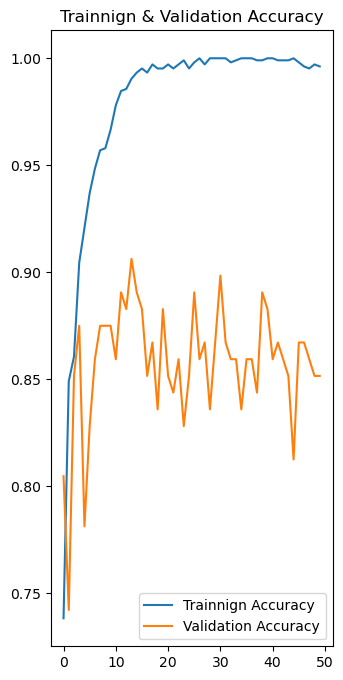

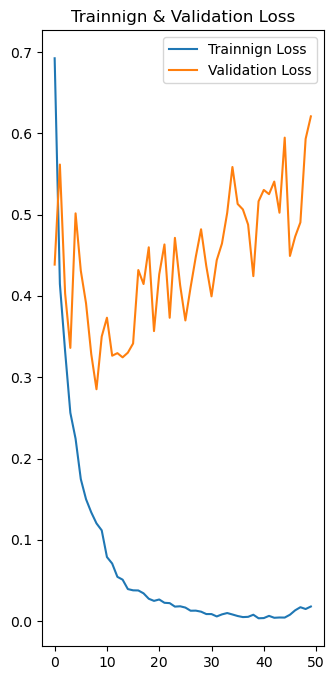

In [14]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label = "Trainnign Accuracy")
plt.plot(range(EPOCHS), val_accuracy, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Trainnign & Validation Accuracy")

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = "Trainnign Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title("Trainnign & Validation Loss")
plt.show()

In [15]:
model.evaluate(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 565ms/step - accuracy: 0.8520 - loss: 0.4801


[0.5176647901535034, 0.84375]